# Carbon dioxide (CO2)

Databases used:
- Atmospheric C02 from the Muana Loa Observatory ([ESRL at NOAA](https://www.esrl.noaa.gov/))
- Oceanic values from the Hawaii Ocean Time-series ([HOT](http://hahana.soest.hawaii.edu/hot))

In [1]:
import os
import os.path as op

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

import sys
sys.path.append("../../../functions")
from data_downloaders import download_HOT_CO2_data, download_MLO_CO2_data

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting import plot_timeseries
from ind_setup.plotting_int import plot_timeseries_interactive
from ind_setup.tables import plot_df_table

## Observations from NOAA

In [2]:
update_data = True
path_data = "../../../data"

In [3]:
url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt'

if update_data:
    MLO_data = download_MLO_CO2_data(url)
    MLO_data.to_pickle(op.join(path_data, 'MLO_co2.pkl'))
else:
    MLO_data = pd.read_pickle(op.join(path_data, 'MLO_co2.pkl'))    

## Observations from U.Hawaii

## Plotting

Muana Loa Observatory

In [4]:
dict_plot = [{'data' : MLO_data, 'var' : 'CO2', 'ax' : 1, 'label' : 'MLO: CO2'},]

In [5]:
MLO_data['CO2_deseasoned'] = MLO_data['CO2'].rolling(window=12, center=True).mean()

In [6]:
dict_plot = [{'data' : MLO_data, 'var' : 'CO2', 'ax' : 1, 'trendline' : True, 'label' : 'MLO: CO2'},
             {'data' : MLO_data, 'var' : 'CO2_deseasoned', 'ax' : 1, 'trendline' : False, 'label' : 'MLO: CO2 (Deseasoned)'}]

In [7]:
plot_timeseries_interactive(dict_plot, trendline = False, figsize = (20, 12));


In [8]:
plot_timeseries_interactive(dict_plot, trendline = True, figsize = (20, 10));


In [9]:
from scipy.stats import linregress
MLOy = MLO_data[['CO2']].groupby(MLO_data.index.year).mean()
MLOy.index = pd.to_datetime(MLOy.index, format = '%Y')
slope, intercept, r_value, p_value, std_err = linregress(MLOy.index.year, MLOy['CO2'])

Annual Stats

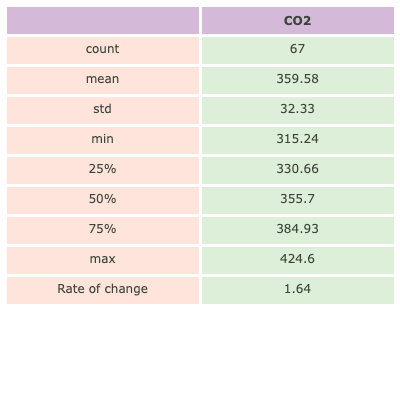

In [10]:
d = MLOy.describe()
d.loc['Rate of change'] = slope
fig = plot_df_table(np.round(d, 2), figsize = (400, 400))
